Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = './readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
print(transactions.shape)
print(transactions.head)

print(items.shape)
print(items.head)

print(item_categories.shape)
print(item_categories.head)

print(shops.shape)
print(shops.head)

(2935849, 6)
<bound method NDFrame.head of                date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
5        10.01.2013               0       25     2564      349.00   
6        02.01.2013               0       25     2565      549.00   
7        04.01.2013               0       25     2572      239.00   
8        11.01.2013               0       25     2572      299.00   
9        03.01.2013               0       25     2573      299.00   
10       03.01.2013               0       25     2574      399.00   
11       05.01.2013               0       25     2574      399.00   
12       07.01.2013               0       25     2574      3

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [82]:
# YOUR CODE GOES HERE
## instead of tedious manipulations with data colum we could use date_block_num feature. value 20 corresponds of september 2014
transaction_small = transactions[transactions.date_block_num ==20]

#calculate revenue for each transaction
transaction_small['revenue'] = transaction_small['item_cnt_day']*transaction_small['item_price']

#now we can calculate max value with chained operations of grouping, summing and finding max value
max_revenue = transaction_small.groupby('shop_id')['revenue'].sum().max()
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


C:\Users\kirill.romanov\Anaconda3\envs\aind\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [144]:
# YOUR CODE GOES HERE
#create small dataframe (df) based on filtered big df. Select only jun-aug 2014 period
transaction_small_jun_aug = transactions[(transactions.date_block_num >= 17)&(transactions.date_block_num <= 19)]

#calculate revenue for each transaction
transaction_small_jun_aug['revenue'] = transaction_small_jun_aug['item_cnt_day']*transaction_small_jun_aug['item_price']
joined_df = pd.merge(transaction_small_jun_aug, items, on = ['item_id'], how='left')

category_id_with_max_revenue = joined_df.groupby('item_category_id')['revenue'].sum().argmax()
tt = category_id_with_max_revenue[:10][:1]
print(category_id_with_max_revenue.nlargest(1))

item_category_id
20    32157302.43
Name: revenue, dtype: float64


C:\Users\kirill.romanov\Anaconda3\envs\aind\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [146]:
# YOUR CODE GOES HERE
#create small dataframe (df) based on filtered big df. Select only jun-aug 2014 period
transaction_small_jun_aug = transactions[(transactions.date_block_num >= 17)&(transactions.date_block_num <= 19)]

#calculate revenue for each transaction
transaction_small_jun_aug['revenue'] = transaction_small_jun_aug['item_cnt_day']*transaction_small_jun_aug['item_price']
joined_df = pd.merge(transaction_small_jun_aug, items, on = ['item_id'], how='left')

category_id_with_max_revenue = joined_df.groupby('item_category_id')['revenue'].sum().argmax()
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


C:\Users\kirill.romanov\Anaconda3\envs\aind\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [172]:
# YOUR CODE GOES HERE
small = transactions[['item_id', 'item_price']]

all_combos_item_price = small.groupby(['item_id', 'item_price']).size().reset_index(name='counts')
num_changes_price_by_item = all_combos_item_price.groupby(['item_id']).size().reset_index(name='counts')
num_items_constant_price = num_changes_price_by_item[num_changes_price_by_item.counts==1].shape[:1][0]

grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

C:\Users\kirill.romanov\Anaconda3\envs\aind\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


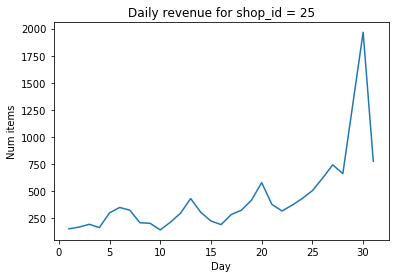

Current answer for task total_num_items_sold_var is: 117167.702299


In [194]:
shop_id = 25
shop_transaction_dec_2014 = transactions[(transactions.date_block_num ==23)&(transactions.shop_id ==shop_id)]
shop_transaction_dec_2014['day'] = shop_transaction_dec_2014['date'].map(lambda x: pd.to_datetime(x, dayfirst = True).day)
# print(shop_transaction_dec_2014[:2])

day_items_data = shop_transaction_dec_2014[['day', 'item_cnt_day']]
sumed_sales =  day_items_data.groupby('day').sum().reset_index()

total_num_items_sold = sumed_sales['item_cnt_day'].values
days = sumed_sales['day'].values

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = sumed_sales['item_cnt_day'].var()
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [195]:
STUDENT_EMAIL = 'kirill.v.romanov@gmail.com'
STUDENT_TOKEN = 'lka5FezQMrkYEY8g'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [196]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)